# Remy Adams

## Research question/interests

My research question is do pressure changes vary seasonally? and what seasonal patterns will you find on Mars? I chose these questions because with my group we talked a lot about the potential for life to be sustained on Mars and a big factor in that would be temperature. Knowing that Earth has a fairly predictable seasonal pattern, I thought it would be interesting to see what patterns exist on Mars and if we could pinpoint a winter, spring, summer and fall. 

In [1]:
import pandas as pd

In [2]:
rawmars_Data = pd.read_csv("../data/raw/mars-weather.csv")
rawmars_Data 



,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


### MILESTONE 3


### Task 1 Data Analysis:

In [3]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print("Number of rows and columns respectively:", rawmars_Data.shape)
print("Columns in the dataset:", rawmars_Data.columns)


Number of rows and columns respectively: (1894, 10)
Columns in the dataset: Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')


In [4]:
rawmars_Data.nunique(axis=0)


id                  1894
terrestrial_date    1894
sol                 1894
ls                   360
month                 12
min_temp              29
max_temp              46
pressure             199
wind_speed             0
atmo_opacity           2
dtype: int64

In [5]:
rawmars_Data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.000000
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,nan
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,nan
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,nan
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,nan
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,nan
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,nan
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,nan


In [6]:
rawmars_Data.pressure.unique

<bound method Series.unique of 0       727.0
1       728.0
2       729.0
3       729.0
4       730.0
        ...  
1889    741.0
1890    740.0
1891    739.0
1892      NaN
1893      NaN
Name: pressure, Length: 1894, dtype: float64>

<AxesSubplot:xlabel='ls', ylabel='pressure'>

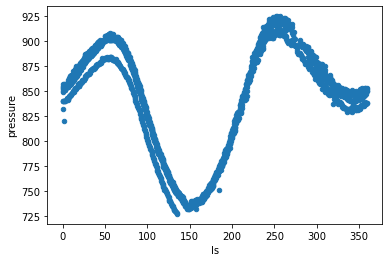

In [7]:
rawmars_Data.plot(kind='scatter', y='pressure', x='ls')
#Interesting to note autumnal equinox is when ls is at 0 and during this period the atmospheric pressure (AP) ranges from about 820-860AP
# Winter solstice = ls is 90
#Spring equinox = ls is 180
#Summer solstice = ls is 270
#The pressure changes with seasons is interesting to take note of because my initial question is does AP change seasonally.

<AxesSubplot:xlabel='ls', ylabel='min_temp'>

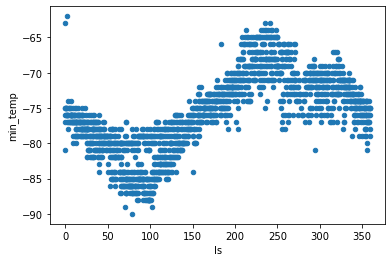

In [8]:
rawmars_Data.plot(kind='scatter', x='ls', y='min_temp')
#Interesting to note the lowest temps in comparison with the various equinox's because we can compare the temp during those periods on mars to the temps we see on earth

### Task 2 Analysis Pipeline

In [9]:
rawmars_Data

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [10]:
rawmars_Data_cleaned1 = rawmars_Data.copy().drop(['wind_speed','id','atmo_opacity','month'], axis=1)
rawmars_Data_cleaned1

,terrestrial_date,sol,ls,min_temp,max_temp,pressure
0,2018-02-27,1977,135,-77.0,-10.0,727.0
1,2018-02-26,1976,135,-77.0,-10.0,728.0
2,2018-02-25,1975,134,-76.0,-16.0,729.0
3,2018-02-24,1974,134,-77.0,-13.0,729.0
4,2018-02-23,1973,133,-78.0,-18.0,730.0
...,...,...,...,...,...,...
1889,2012-08-18,12,156,-76.0,-18.0,741.0
1890,2012-08-17,11,156,-76.0,-11.0,740.0
1891,2012-08-16,10,155,-75.0,-16.0,739.0
1892,2012-08-15,9,155,NaN,NaN,NaN


In [11]:
rawmars_Data_cleaned2= rawmars_Data_cleaned1.rename(columns={"terrestrial_date":"date"})
rawmars_Data_cleaned2

,date,sol,ls,min_temp,max_temp,pressure
0,2018-02-27,1977,135,-77.0,-10.0,727.0
1,2018-02-26,1976,135,-77.0,-10.0,728.0
2,2018-02-25,1975,134,-76.0,-16.0,729.0
3,2018-02-24,1974,134,-77.0,-13.0,729.0
4,2018-02-23,1973,133,-78.0,-18.0,730.0
...,...,...,...,...,...,...
1889,2012-08-18,12,156,-76.0,-18.0,741.0
1890,2012-08-17,11,156,-76.0,-11.0,740.0
1891,2012-08-16,10,155,-75.0,-16.0,739.0
1892,2012-08-15,9,155,NaN,NaN,NaN


In [12]:

rawmars_Data_cleaned3 = rawmars_Data_cleaned2.reindex(["date", "min_temp", "max_temp", "pressure", "ls", "sol"],axis=1)
rawmars_Data_cleaned3

,date,min_temp,max_temp,pressure,ls,sol
0,2018-02-27,-77.0,-10.0,727.0,135,1977
1,2018-02-26,-77.0,-10.0,728.0,135,1976
2,2018-02-25,-76.0,-16.0,729.0,134,1975
3,2018-02-24,-77.0,-13.0,729.0,134,1974
4,2018-02-23,-78.0,-18.0,730.0,133,1973
...,...,...,...,...,...,...
1889,2012-08-18,-76.0,-18.0,741.0,156,12
1890,2012-08-17,-76.0,-11.0,740.0,156,11
1891,2012-08-16,-75.0,-16.0,739.0,155,10
1892,2012-08-15,NaN,NaN,NaN,155,9


In [13]:
rawmars_Data_cleaned3.shape

(1894, 6)

<AxesSubplot:>

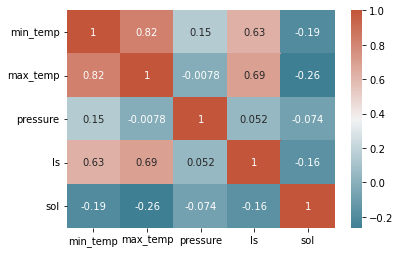

In [14]:
corr = rawmars_Data_cleaned3.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

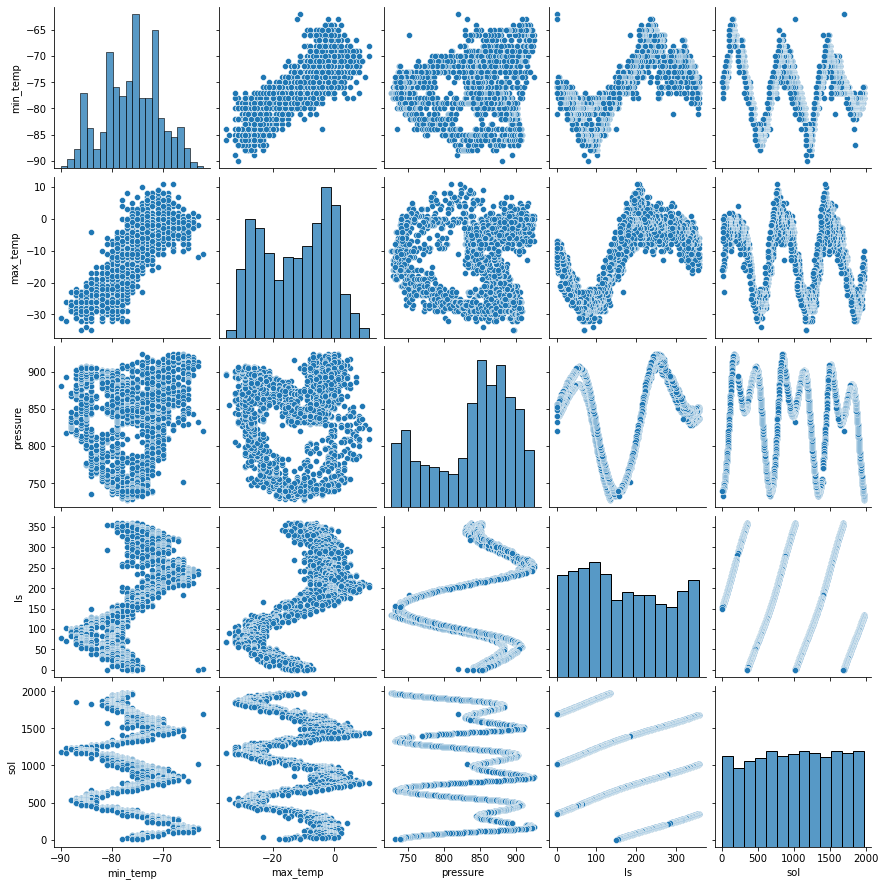

In [15]:
sns.pairplot(rawmars_Data_cleaned3)
#Thought this looked cool, a lot going on for analysis though

<AxesSubplot:ylabel='Frequency'>

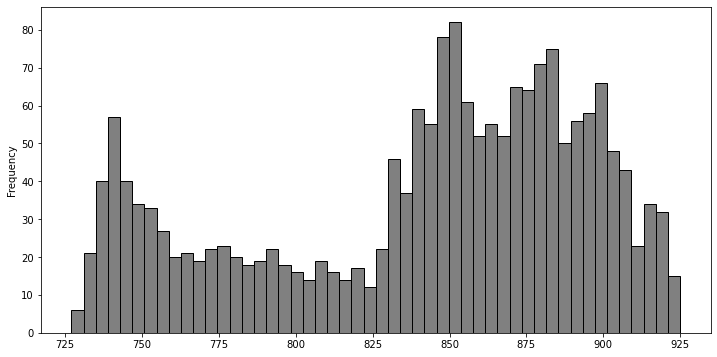

In [16]:
rawmars_Data_cleaned3['pressure'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')
#Shows which pressure is most common and least common

In [17]:
rawmars_Data_cleaned3.to_csv('../data/processed/ProcessedDF2.csv')

### Task 3. Method Chaining and writing Python programs

In [18]:
data= pd.read_csv("../data/raw/mars-weather.csv")




cleaned_rmd= (   
    pd.DataFrame(pd.read_csv("../data/raw/mars-weather.csv"))
    .copy().drop(['wind_speed','id','atmo_opacity','month'], axis=1)
    .rename(columns={"terrestrial_date":"date"})
    .reindex(["date", "min_temp", "max_temp", "pressure", "ls", "sol"],axis=1)
    
)
cleaned_rmd


,date,min_temp,max_temp,pressure,ls,sol
0,2018-02-27,-77.0,-10.0,727.0,135,1977
1,2018-02-26,-77.0,-10.0,728.0,135,1976
2,2018-02-25,-76.0,-16.0,729.0,134,1975
3,2018-02-24,-77.0,-13.0,729.0,134,1974
4,2018-02-23,-78.0,-18.0,730.0,133,1973
...,...,...,...,...,...,...
1889,2012-08-18,-76.0,-18.0,741.0,156,12
1890,2012-08-17,-76.0,-11.0,740.0,156,11
1891,2012-08-16,-75.0,-16.0,739.0,155,10
1892,2012-08-15,NaN,NaN,NaN,155,9


In [19]:
def load_and_processed (f):
    cleaned_rmd= (   
    pd.read_csv(f)
    .copy().drop(['wind_speed','id','atmo_opacity','month'], axis=1)
    .rename(columns={"terrestrial_date":"date"})
    .reindex(["date", "min_temp", "max_temp", "pressure", "ls", "sol"],axis=1)
    
)
    return cleaned_rmd
load_and_processed("../data/raw/mars-weather.csv")

,date,min_temp,max_temp,pressure,ls,sol
0,2018-02-27,-77.0,-10.0,727.0,135,1977
1,2018-02-26,-77.0,-10.0,728.0,135,1976
2,2018-02-25,-76.0,-16.0,729.0,134,1975
3,2018-02-24,-77.0,-13.0,729.0,134,1974
4,2018-02-23,-78.0,-18.0,730.0,133,1973
...,...,...,...,...,...,...
1889,2012-08-18,-76.0,-18.0,741.0,156,12
1890,2012-08-17,-76.0,-11.0,740.0,156,11
1891,2012-08-16,-75.0,-16.0,739.0,155,10
1892,2012-08-15,NaN,NaN,NaN,155,9


In [21]:
import project_functions2 as p2

### Unprocessed File:

In [22]:
data= pd.read_csv("../data/raw/mars-weather.csv")
dfu = p2.unprocessed (data)
dfu

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


### Processed Data:

In [23]:
dfp = p2.load_and_processed("../data/raw/mars-weather.csv")
dfp

,date,min_temp,max_temp,pressure,ls,sol
0,2018-02-27,-77.0,-10.0,727.0,135,1977
1,2018-02-26,-77.0,-10.0,728.0,135,1976
2,2018-02-25,-76.0,-16.0,729.0,134,1975
3,2018-02-24,-77.0,-13.0,729.0,134,1974
4,2018-02-23,-78.0,-18.0,730.0,133,1973
...,...,...,...,...,...,...
1889,2012-08-18,-76.0,-18.0,741.0,156,12
1890,2012-08-17,-76.0,-11.0,740.0,156,11
1891,2012-08-16,-75.0,-16.0,739.0,155,10
1892,2012-08-15,NaN,NaN,NaN,155,9


### Task 4. Analysis

In [24]:
print("Number of rows and columns respectively:", dfp.shape)
print("Columns in the dataset:", dfp.columns)

Number of rows and columns respectively: (1894, 6)
Columns in the dataset: Index(['date', 'min_temp', 'max_temp', 'pressure', 'ls', 'sol'], dtype='object')


In [39]:
dfp.nunique(axis=0)

date        1894
min_temp      29
max_temp      46
pressure     199
ls           360
sol         1894
dtype: int64

In [37]:
dfp.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,min_temp,max_temp,pressure,ls,sol
count,1867.000000,1867.000000,1867.000000,1894.000000,1894.000000
mean,-76.121050,-12.510445,841.066417,169.180570,1007.930306
std,5.504098,10.699454,54.253226,105.738532,567.879561
min,-90.000000,-35.000000,727.000000,0.000000,1.000000
25%,-80.000000,-23.000000,800.000000,78.000000,532.250000
50%,-76.000000,-11.000000,853.000000,160.000000,1016.500000
75%,-72.000000,-3.000000,883.000000,259.000000,1501.750000
max,-62.000000,11.000000,925.000000,359.000000,1977.000000


In [40]:
dfp

,date,min_temp,max_temp,pressure,ls,sol
0,2018-02-27,-77.0,-10.0,727.0,135,1977
1,2018-02-26,-77.0,-10.0,728.0,135,1976
2,2018-02-25,-76.0,-16.0,729.0,134,1975
3,2018-02-24,-77.0,-13.0,729.0,134,1974
4,2018-02-23,-78.0,-18.0,730.0,133,1973
...,...,...,...,...,...,...
1889,2012-08-18,-76.0,-18.0,741.0,156,12
1890,2012-08-17,-76.0,-11.0,740.0,156,11
1891,2012-08-16,-75.0,-16.0,739.0,155,10
1892,2012-08-15,NaN,NaN,NaN,155,9


<AxesSubplot:ylabel='Frequency'>

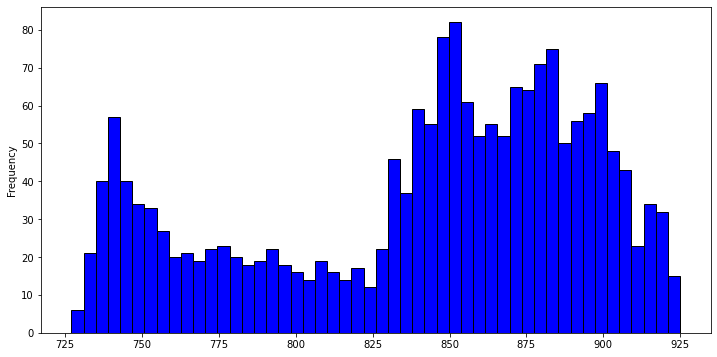

In [32]:
dfp['pressure'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')
#Shows which pressure is most common and least common

#This graph shows that the most common pressure is around 850. 

<AxesSubplot:xlabel='ls', ylabel='pressure'>

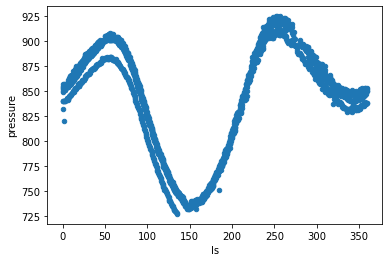

In [42]:
dfp.plot(kind='scatter', y='pressure', x='ls')


#autumnal equinox is when ls is at 0 and during this period the atmospheric pressure (AP) ranges from about 820-860AP
Winter solstice = ls is 90 ap ranges from approx 865-900, Spring equinox = ls is 180 and ap is low staying around 150, Summer solstice = ls is 270 and ap is high ranging from 900-925. This is significant because it reflects pressure changes with seasonal variations. 



<AxesSubplot:>

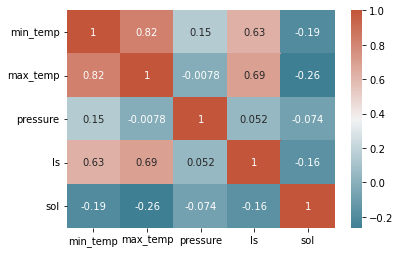

In [36]:
corr = dfp.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))